<a href="https://colab.research.google.com/github/mapmatters/coursera-nlp/blob/main/nlp_class_1_Week4_nb02_hash_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic hash function

In [1]:
import numpy as np
import pprint
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

In [2]:
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        x_dir.append(vec[0][0])
        y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)

In [3]:
def basic_hash_table(value_1, n_buckets):
  def hash_function(value, n_buckets):
    return int(value) % n_buckets
  hash_table = {i:[] for i in range(n_buckets)}

  for value in value_1:
    hash_value = hash_function(value, n_buckets) # get the hash key for the given value
    hash_table[hash_value].append(value)

  return hash_table

In [4]:
value_1 = [100, 10, 14, 17, 97]
hash_table_example = basic_hash_table(value_1, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


# Planes

[0.26190032 0.48803002]


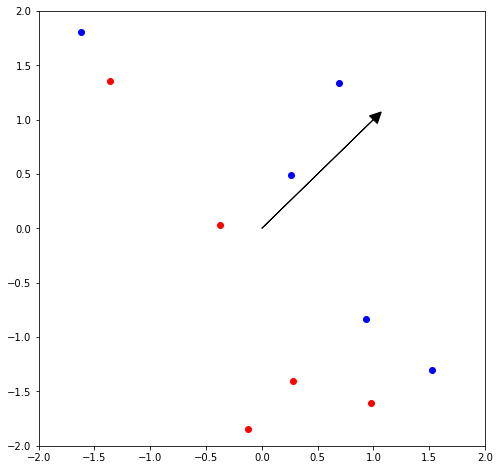

In [5]:
P = np.array([[1,1]])
fig, ax1 = plt.subplots(figsize=(8,8))

plot_vectors([P], axes=[2,2], ax=ax1)

for i in range(0, 10):
  v1 = np.array(np.random.uniform(-2,2,2))
  side_of_plane = np.sign(np.dot(P, v1.T))

  if side_of_plane == 1:
    ax1.plot([v1[0]], [v1[1]], 'bo')
  else:
    ax1.plot([v1[0]], [v1[1]], 'ro')

print(v1)
plt.show()

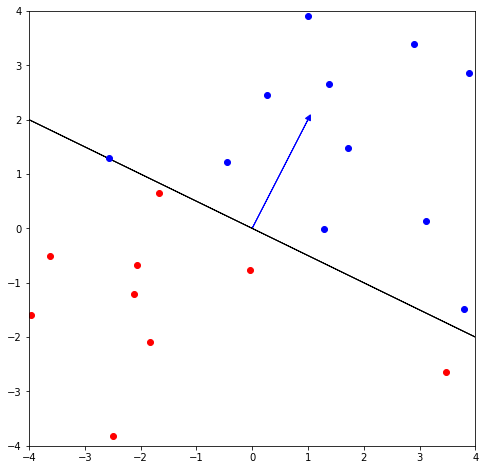

In [8]:
P = np.array([[1,2]])

PT = np.dot([[0,1], [-1,0]], P.T).T

fig, ax1 = plt.subplots(figsize=(8,8))

plot_vectors([P], colors=['b'], axes=[2,2], ax=ax1)

plot_vectors([PT * 4, PT * -4], colors = ['k', 'k'], axes=[4,4], ax=ax1)

for i in range(0,20):
  v1 = np.array(np.random.uniform(-4,4,2))
  side_of_plane = np.sign(np.dot(P, v1.T))
  if side_of_plane ==1:
    ax1.plot([v1[0]], [v1[1]], 'bo')
  else:
    ax1.plot([v1[0]], [v1[1]], 'ro')

plt.show()

In [9]:
P = np.array([[1,1]])
v1 = np.array([[1,2]])
v2 = np.array([[-1,1]])
v3 = np.array([[-2, -1]])

In [10]:
np.dot(P, v1.T)

array([[3]])

In [11]:
np.dot(P, v2.T)

array([[0]])

In [12]:
np.dot(P, v3.T)

array([[-3]])

In [13]:
def side_of_plane(P, v):
  dotproduct = np.dot(P, v.T)
  sign_of_dot_product = np.sign(dotproduct)
  sign_of_dot_product_scalar = sign_of_dot_product.item() # the value of the first item
  return sign_of_dot_product_scalar

In [14]:
side_of_plane(P, v1)

1

In [15]:
side_of_plane(P, v2)

0

In [16]:
side_of_plane(P, v3)

-1

# Hash function with multiple planes

In [17]:
P1 = np.array([[1,1]])
P2 = np.array([[-1,1]])
P3 = np.array([[-1, -1]])
P_1 = [P1, P2, P3]

v = np.array([[2,2]])

In [18]:
def hash_multi_plane(P_1, v):
  hash_value = 0
  for i, P in enumerate(P_1):
    sign = side_of_plane(P, v)
    hash_i = 1 if sign>=0 else 0
    hash_value += 2**i * hash_i
  return hash_value

In [19]:
hash_multi_plane(P_1, v)

3

# Random Plane

In [22]:
np.random.seed(0)
num_dimensions = 2
num_planes = 3
random_planes_matrix = np.random.normal(
    size = (num_planes, num_dimensions))
print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [23]:
v = np.array([[2,2]])

In [24]:
def side_of_plane_matrix(P, v):
  dotproduct = np.dot(P, v.T)
  sign_of_dot_product = np.sign(dotproduct)
  return sign_of_dot_product

In [26]:
sides_1 = side_of_plane_matrix(
    random_planes_matrix,v
)
sides_1

array([[1.],
       [1.],
       [1.]])

In [29]:
def hash_multi_plane_matrix(P, v, num_planes):
  sides_matrix = side_of_plane_matrix(P, v)
  hash_value = 0
  for i in range(num_planes):
    sign = sides_matrix[i].item()
    hash_i = 1 if sign >=0 else 0 
    hash_value += 2**i * hash_i 
  return hash_value

In [30]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7

# Document vectors

In [34]:
word_embedding = {"I": np.array([1,0,1]),
                   "love": np.array([-1,0,1]),
                   "learning": np.array([1,0,1])
                  }
words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = np.array([0,0,0])

for word in words_in_document:
  k = word_embedding.get(word,0)
  document_embedding += k
  print(word, k, document_embedding)

print(document_embedding)

I [1 0 1] [1 0 1]
love [-1  0  1] [0 0 2]
learning [1 0 1] [1 0 3]
not_a_word 0 [1 0 3]
[1 0 3]
